In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
mnist.target.shape

(70000,)

In [5]:
X, y = mnist.data, mnist.target

In [6]:
y.shape

(70000,)

In [7]:
X.shape

(70000, 784)

In [8]:
28*28

784

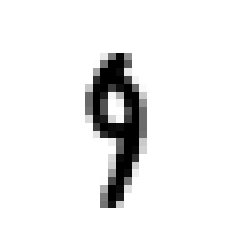

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

some_digit = X[2600]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Przetasujmy również zbiór danych uczących; dzięki temu mamy pewność, że podzbiory utworzone
podczas sprawdzianu krzyżowego będą do siebie podobne (nie chcemy, aby w którymś podzbiorze
zabrakło jakiejś cyfry). Ponadto niektóre algorytmy są wrażliwe na kolejność próbek uczących i nie
za dobrze sobie radzą, jeżeli przetwarzają wiele podobnych przykładów z rzędu. Unikniemy tego problemu dzięki przetasowaniu zbioru danych

In [11]:
shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [12]:
grid_search.best_params_from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{"weights": ['uniform', 'distance'] }, {'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 183.9min remaining: 58.1min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 285.1min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'weights': ['uniform', 'distance']},
                         {'n_neighbors': [3, 4, 5]}],
             verbose=3)

In [13]:
grid_search.best_params_

{'n_neighbors': 3}

In [14]:
grid_search.best_score_

0.9716833333333333

W celu uzyskania macierzy pomyłek należy najpierw uzyskać zbiór prognoz, które porównamy z rzeczywistymi wartościami docelowymi. 

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [15]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

In [19]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int8)

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].